# Exploratory data analysis (EDA) using IRIS dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#import data
iris=pd.read_csv("Datasets/IRIS.csv")
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [5]:
#to check how many features and rows are there 
iris.shape

(150, 5)

In [8]:
#Colunmns name in our data
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
#Q- How many different species are present in data
iris["species"].value_counts()

#3 types of Classses/species are present
'''By this we also see that data is balanced'''

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## 1. Scatter plot

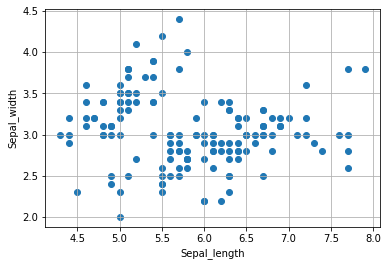

In [17]:
plt.xlabel("Sepal_length")
plt.ylabel("Sepal_width")

plt.scatter(iris["sepal_length"], iris["sepal_width"])
plt.grid()
plt.show()

""" we are not able to make much sense out of it
as we it is not shown which point belong to which species """

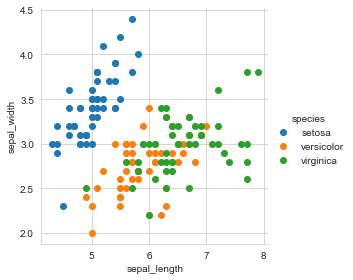

In [32]:
#Scatter plot with different color for different species
#hue =  plots different subsets of data in different colors
sns.set_style("whitegrid")
g=sns.FacetGrid(iris,hue='species',height=4)
g.map(plt.scatter,'sepal_length', 'sepal_width')
g.add_legend()

plt.show()
plt.close()

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## 2. Pair plot

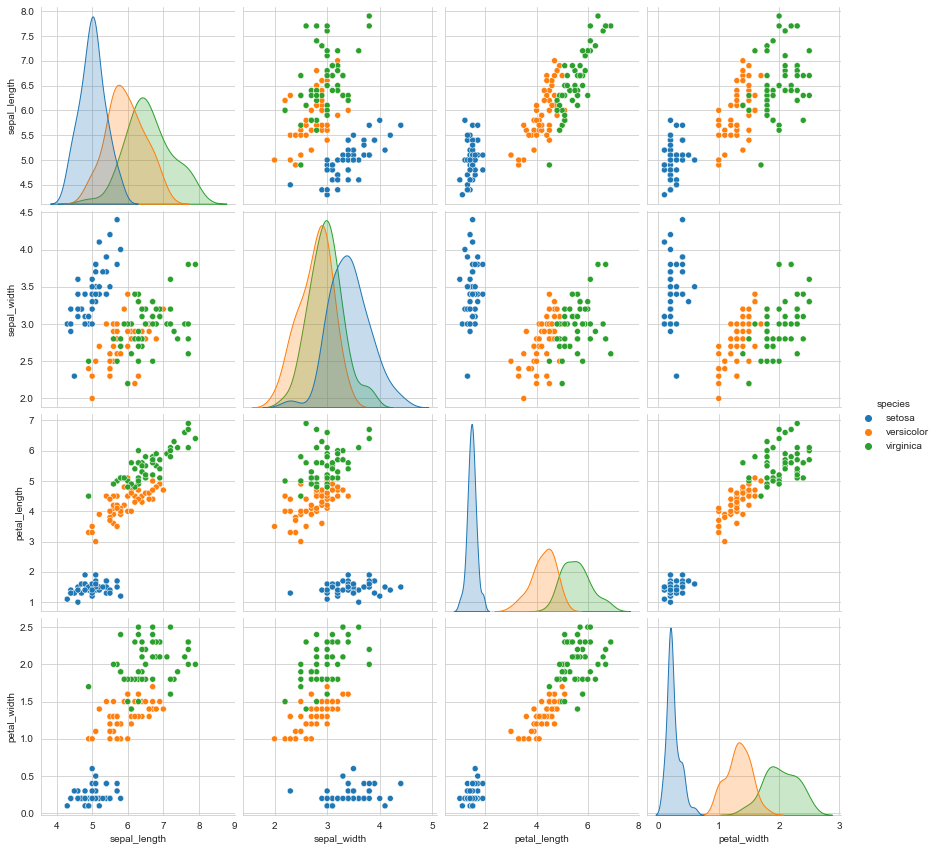

In [35]:
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", height=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

#### Observations
1. Setosa is linearly separable while virnica and versicolor have some overlap in all the features
2. petal_length vs Petal_width are the most useful features to identify various flower types

## 3. 1-D Plot

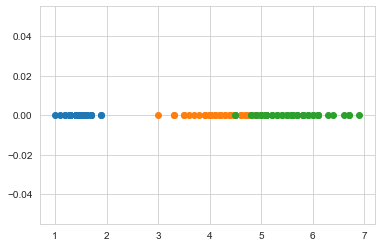

In [42]:
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["species"] == "setosa"]
iris_virginica = iris.loc[iris["species"] == "virginica"]
iris_versicolor = iris.loc[iris["species"] == "versicolor"]
#print(iris_setosa)

plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points are overlapping a lot.

## 4. Histogram, PDF

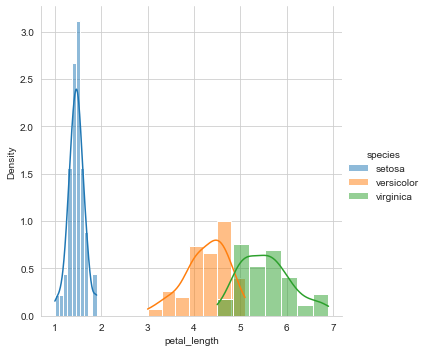

In [66]:
'''HISTOGRAM of petal_length of diff species'''
#Also called DENSITY PLOT
g=sns.FacetGrid(iris, hue="species", height=5)
g.map(sns.histplot, "petal_length", kde=True, stat="density")
g.add_legend()
plt.show()



#### Observations
1. It selects right bin accordingly on its own
2. mostly all the setosa peal_length is in range 1-2 and 
    a lot of have petal_length as 1.6
3. outer curve is the PDF
4. we cannot estimate what percentage of versicolor points have a petal_length < 5 

## 5. CDF

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


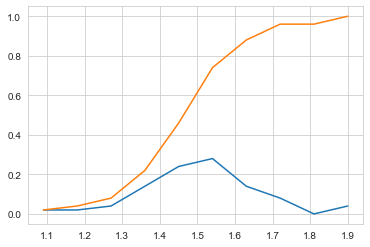

In [69]:
#CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show();


#### Observation

1. At X = 1.6 (petal length), we can say that there are 82% of setosa flower that have pl<=1.6 
from the orange line which is CDF of the data 
2. we couldnt say the same from pdf

In [70]:
'''Explanation of DF calculation'''

import numpy as np

# consider you have an array like this

a= [1, 2, 3, 5, 10,11, 12, 13, 14, 15, 21,23, 25, 26, 27, 29, 30,31, 35, 51]

# here we have decided to group all these numbers into 5 bins

# i.e bins = 5

# the minimum number in the array is 1

# the maximum number in the array is 51

# the width of each bin is calculated as = ((max - min) / bins)

# width of each bin = (51-1)/5 = 10

# Since we got each bin with as 10, we can choose the bin edges like this

# 1 ...... 11 ....... 21 ........ 31 ....... 41 ....... 51

# |---10---|----10----|----10-----|----10----|----10----|

# so we have found out the bin edges now

# to find thte counts we calcuate how many number of points fall into each bin

# therefore the count of a bin = number of elements of a such that left_bin_egde<=ai 5 [1,2,3,5,10]

# ii. number of elements belongs to the 2nd bin 11<=x<21 => 5 [11,12,13,14,15]

# iii. number of elements belongs to the 3rd bin 21<=x<31 => 7 [21,23,25,26,27,29,30]

# iii. number of elements belongs to the 3rd bin 21<=x<31 => 7 [21,23,25,26,27,29,30]

# iv. number of elements belongs to the 4th bin 31<=x<41 => 2 [31,35]

# v. number of elements belongs to the 5th bin 41<=x<=51 => 1 [51]

# note: from the documentation: https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html

# All but the last (righthand-most) bin is half-open i.e [1,2,3,4], the bins are [1,2), [2,3), [3,4]

# [1,10) = 1,2,3,4,5,6,7,8,9 means includig 1 and but not 10. its half open bracket

print('='*30, "explaining 'bin edges and counts",'='*30)

counts,bins = np.histogram(a, bins=5)

print("bin edges :",bins)

print("counts per each bin :",counts)

# density: bool, optional

# If False, the result will contain the number of samples in each bin. 

# If True, the result is the value of the probability density function at the bin, normalized such that the integral over the range is 1. 

# Note that the sum of the histogram values will not be equal to 1 unless bins of unity width are chosen;

# it is not a probability mass function.

# and from the source code

#if density:

#        db = np.array(np.diff(bin_edges), float)

#        return n/db/n.sum(), bin_edges

# here the n => number of elements for each bin

n = counts

# and db = difference between bin edges

db = np.array(np.diff(bins))

# n.sum() number of all the elemnts 

print('='*30, "explaining 'density=True' parameter",'='*30)

print("manual calculated densities for each bin",counts/db/counts.sum())

counts, bins = np.histogram(a, bins=5, density=True)

print("bin edges :",bins)

print("counts per each bin using density=True:",counts)

print('='*30, "explaining counts/sum(counts)",'='*30)

# pleasen note that the documentation says when you have density=True, 

# "that the sum of the histogram values will not be equal to 1"

# this is simple logic we used, to make the whole sum=1, we have divided each element by the number of whole elements

counts, bins = np.histogram(a, bins=5, density=True)

print("bin edges :",bins)

# sum(counts) = summ of all the elements in the counts array = [0.025 + 0.025 + 0.035 + 0.01 + 0.005] = 0.1

# counts/sum(counts) = devide every element of counts=[0.025/0.1, 0.025/0.1, 0.035/0.1, 0.01/0.1, 0.005/0.1] = [0.25 0.25 0.35 0.1  0.05]

print("counts per each bin using density=True:",counts/sum(counts))

============================== explaining 'bin edges and counts ==============================
bin edges : [ 1. 11. 21. 31. 41. 51.]
counts per each bin : [5 5 7 2 1]
============================== explaining 'density=True' parameter ==============================
manual calculated densities for each bin [0.025 0.025 0.035 0.01  0.005]
bin edges : [ 1. 11. 21. 31. 41. 51.]
counts per each bin using density=True: [0.025 0.025 0.035 0.01  0.005]
============================== explaining counts/sum(counts) ==============================
bin edges : [ 1. 11. 21. 31. 41. 51.]
counts per each bin using density=True: [0.25 0.25 0.35 0.1  0.05]


## 6. Mean, Variance and Std-dev

In [71]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))

#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Means:
1.464
2.4156862745098038
5.552
4.26

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


## 6. Median, Percentile, Quantile, IQR, MAD

In [74]:
#MEDIAN

print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))

#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


#QUANTILES

print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

#PERCENTILES
print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

#IQR
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


#### Observation
1. In quantiles we are getting [0th, 25th, 50th, 75th] percentile value
2. 50th percentile = median
3. 90th percentile means , 90% of the points have <= _value
4. IQR - Conveys how much of the data lies in between 75th to 25th percentile

## 7. BOX PLOT

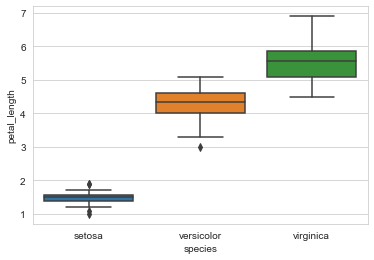

In [75]:
sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

### Observations

1. Box = IQR range
2. Median is the middle line
3. Diamond shape = outlier
4. black lines are maximum and minimum 
5. seaborn uses 1.5*(IQR)

## 8. Violin plots

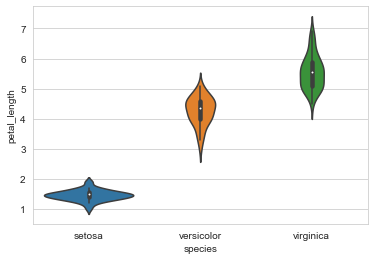

In [76]:
# A violin plot combines the benefits of the previous two plots and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

### 9. Univariate Analysis
The most common univariate analysis is checking the central tendency (mean, median and mode), the range, the maximum and minimum values, and standard deviation of a variable.

### 10. Bivariate Analysis
pair plots, Scatter plots

### 11. Multivariate
3 variables plots

## 12. Multivariate probability density, contour plot.


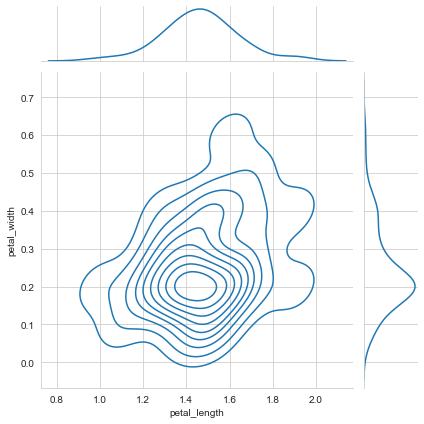

In [77]:
#2D Density plot, contors-plot
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();
